# Stochastic Gradient Descent
**Modified the same "Two-Layer Fully Connected Network" code to execute the "Stochastic Gradient Descent".**

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train: (50000, 32, 32, 3)


In [14]:
# Define variables 
batch_size = 500
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6

In [12]:
H = 200

# Define Stochastic Gradient Descent function as sgd()
def sgd(x_train,y_train,x_test,y_test,K,Din,lr,lr_decay,reg):
    Ntr = x_train.shape[0]
    Nte = x_test.shape[0]

    loss_history = []
    train_acc_history = []
    val_acc_history = []
    minibatch_loss_history = []
    lr_history=[]
    seed = 0
    rng = np.random.default_rng(seed=seed)
    m = x_train.shape[0]

    std=1e-5
    #Middle hidden layer
    w1 = std*np.random.randn(Din, H)
    b1 = np.zeros(H)

    #Last layer
    w2 = std*np.random.randn(H, K)
    b2 = np.zeros(K)

    for t in range(iterations):
    
        for start in range(0, Ntr, batch_size):
            batch_indices = np.random.choice(Ntr, batch_size)
            x = x_train[batch_indices]
            y = y_train[batch_indices]
            
            # Forward propgation
            h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1 ))) # Hypothesis function for training data(sigmoid function)
            y_pred = h.dot(w2) + b2 # Prediction

            h_t = 1.0/(1.0 + np.exp(-(x_test.dot(w1) + b1 ))) # Hypothesis function for test data (sigmoid function)
            y_pred_test = h_t.dot(w2) + b2 # Prediction

            train_loss = (1./(y_pred.shape[0]))*np.square(y_pred - y).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1)) # loss function
            
        
            # Compute the accuracy
            train_acc = (1 - (1/((y_pred.shape[0])*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
            test_acc = (1 - (1/((y_pred_test.shape[0])*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
        
            
            # Backward propagation
            dy_pred = 1./batch_size*2.0*(y_pred - y)
            dw2 = h.T.dot(dy_pred) + reg*w2
            db2 = dy_pred.sum(axis=0)
            dh = dy_pred.dot(w2.T)
            dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
            db1 = (dh*h*(1-h)).sum(axis=0)
            w1 -= lr*dw1
            w2 -= lr*dw2
            b1 -= lr*db1
            b2 -= lr*db2
            lr *= lr_decay
        
        # Calculate accuracies
        train_acc_history.append(train_acc)
        val_acc_history.append(test_acc)
        loss_history.append(train_loss)
        lr_history.append(lr)
        if t%10 == 0:
                print('Epoch %3d/%d:==> Train Loss= %f | Train Accuracy= %f | Test Accuracy= %f' % (t,iterations,train_loss,train_acc,test_acc))
            
    return w1,b1,loss_history,train_acc_history,val_acc_history

In [15]:
w1_3,b1_3,loss_history_3,train_acc_history_3,val_acc_history_3=sgd(x_train,y_train,x_test,y_test,K,Din,lr,lr_decay,reg)

Epoch   0/300:==> Train Loss= 0.792335 | Train Accuracy= 0.762400 | Test Accuracy= 0.766340
Epoch  10/300:==> Train Loss= 0.687558 | Train Accuracy= 0.824600 | Test Accuracy= 0.795750
Epoch  20/300:==> Train Loss= 0.632095 | Train Accuracy= 0.855400 | Test Accuracy= 0.801410
Epoch  30/300:==> Train Loss= 0.591547 | Train Accuracy= 0.882800 | Test Accuracy= 0.799890
Epoch  40/300:==> Train Loss= 0.594631 | Train Accuracy= 0.884200 | Test Accuracy= 0.800320
Epoch  50/300:==> Train Loss= 0.585784 | Train Accuracy= 0.878400 | Test Accuracy= 0.801310
Epoch  60/300:==> Train Loss= 0.576875 | Train Accuracy= 0.869000 | Test Accuracy= 0.801160
Epoch  70/300:==> Train Loss= 0.599119 | Train Accuracy= 0.880400 | Test Accuracy= 0.801000
Epoch  80/300:==> Train Loss= 0.586844 | Train Accuracy= 0.884400 | Test Accuracy= 0.800980
Epoch  90/300:==> Train Loss= 0.589199 | Train Accuracy= 0.888800 | Test Accuracy= 0.801180
Epoch 100/300:==> Train Loss= 0.576037 | Train Accuracy= 0.869400 | Test Accurac

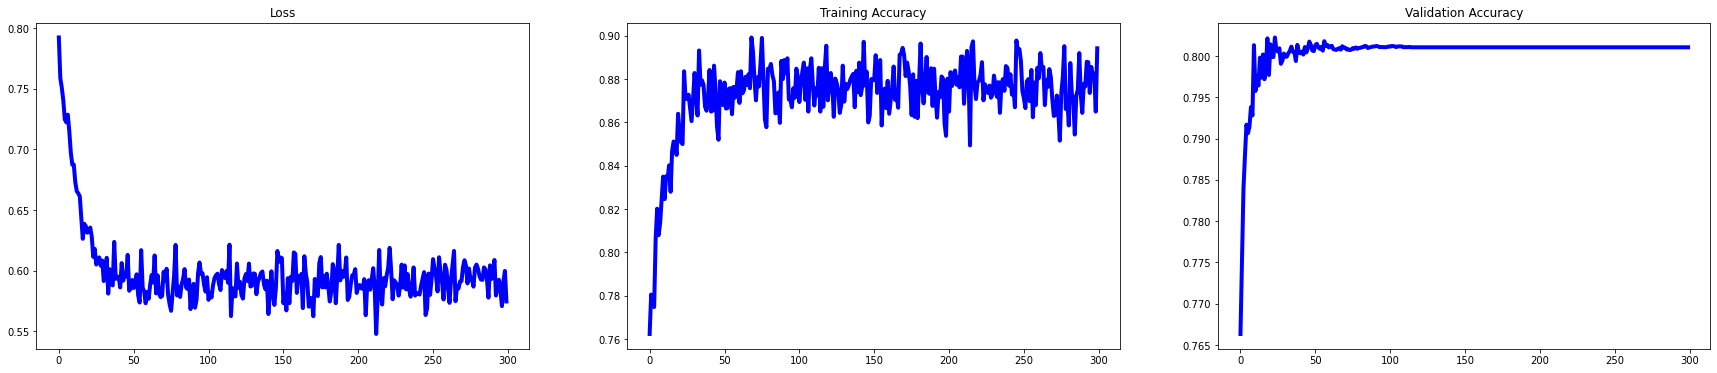

In [16]:
fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(30,6))
items = {"Loss":loss_history_3, "Training Accuracy":train_acc_history_3,"Validation Accuracy": val_acc_history_3}

graph = 1
for key in items.keys():
    plt.subplot(1,3,graph);plt.plot(items[key], color='#0000ff', linewidth=4)
    plt.title(key)
    graph+=1

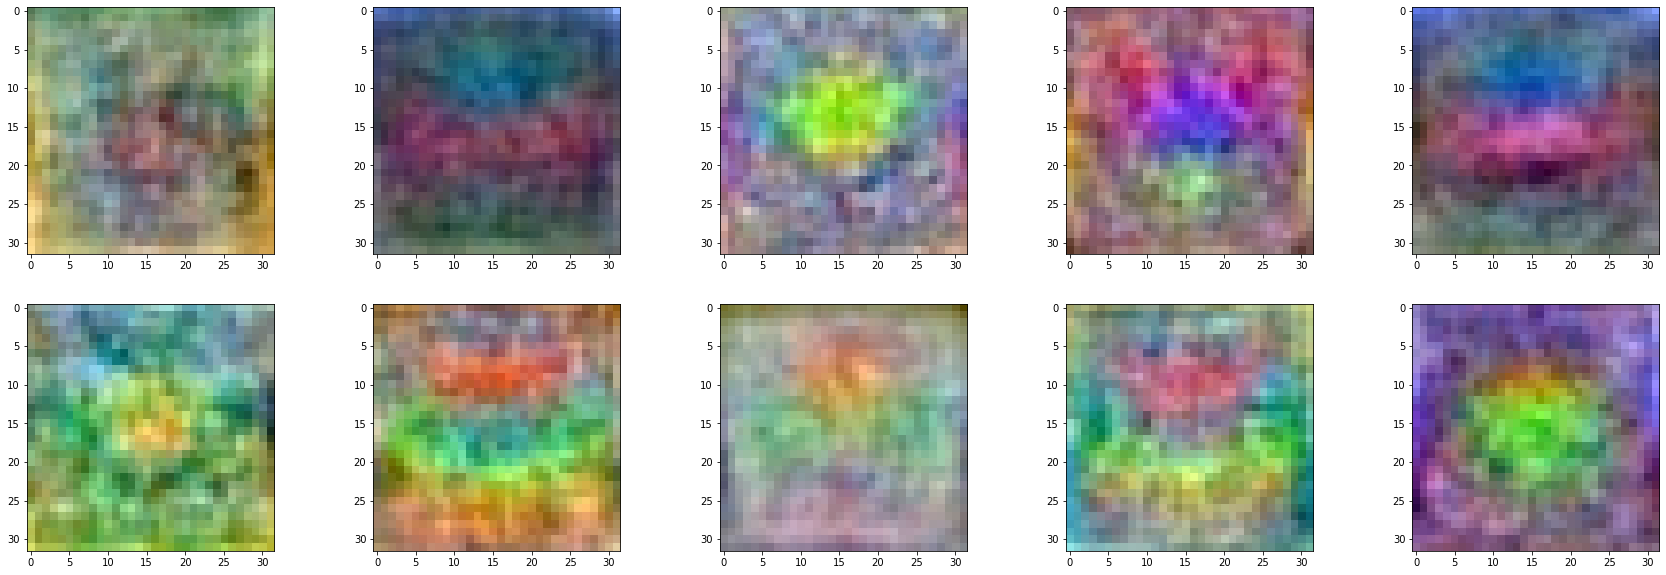

In [24]:
images=[]
for i in range(w1_3.shape[1]):
    #images.append(np.reshape(w1[:,i]*255,(32,32,3))+np.reshape(mean_image,(32,32,3)))
    temp=np.reshape(w1_3[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(30,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
plt.show()
